In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
bl_char_stats_dict = defaultdict(int)
german_char_stats_dict = defaultdict(int)
french_char_stats_dict = defaultdict(int)
finnish_char_stats_dict = defaultdict(int)
swedish_char_stats_dict = defaultdict(int)

In [3]:
# English
with open('bl_stats.pickle', 'rb') as f_p:
    bl_char_stats_dict = pickle.load(f_p)

# German
with open('german_europeana_stats.pickle', 'rb') as f_p:
    german_char_stats_dict = pickle.load(f_p)
# French
with open('french_europeana_stats.pickle', 'rb') as f_p:
    french_char_stats_dict = pickle.load(f_p)
# Finnish
with open('finnish_europeana_stats.pickle', 'rb') as f_p:
    finnish_char_stats_dict = pickle.load(f_p)
# Swedish
with open('swedish_europeana_stats.pickle', 'rb') as f_p:
    swedish_char_stats_dict = pickle.load(f_p)

# British Library Corpus Stats

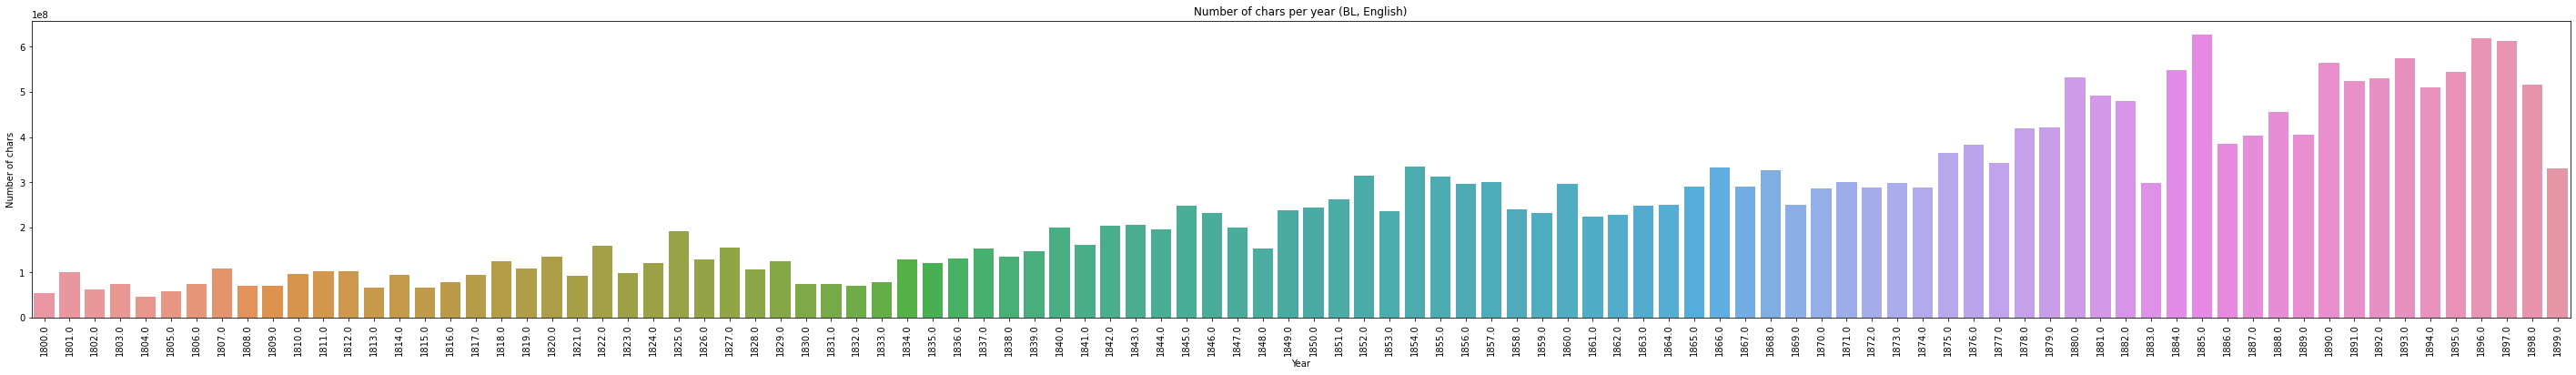

In [6]:
df_bl_stats = pd.DataFrame(bl_char_stats_dict.items(), columns=['year', 'length'])
df_bl_stats["year"] = pd.to_numeric(df_bl_stats["year"])
df_bl_stats_filtered = df_bl_stats[
    (df_bl_stats["year"] >= 1800) & (df_bl_stats["year"] <= 1899)
]

plt.figure(figsize=(50, 6))
bl_plot = sns.barplot(x="year", y="length", data=df_bl_stats_filtered.sort_values(by=['year']))

bl_plot.set_title("Number of chars per year (BL, English)")
bl_plot.set(ylabel="Number of chars")
bl_plot.set(xlabel="Year")
bl_plot.set_xticklabels(bl_plot.get_xticklabels(), rotation=90)

fig = bl_plot.get_figure()
fig.savefig("./figures/bl_corpus_stats.png")

# German Europeana Corpus Stats

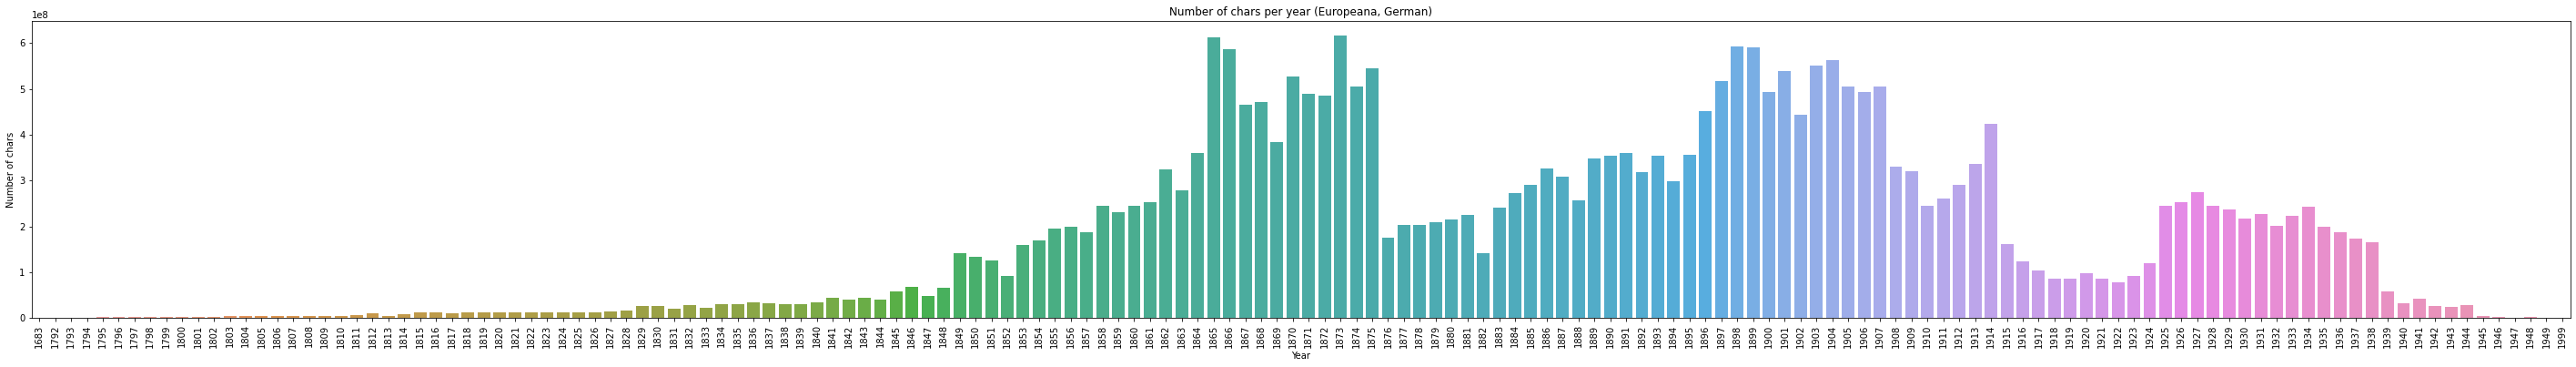

In [7]:
df_german_europeana_stats = pd.DataFrame(german_char_stats_dict.items(), columns=['year', 'length'])

plt.figure(figsize=(50, 6))

german_europeana_plot = sns.barplot(x="year", y="length", data=df_german_europeana_stats.sort_values(by=['year']))

german_europeana_plot.set_title("Number of chars per year (Europeana, German)")
german_europeana_plot.set(ylabel="Number of chars")
german_europeana_plot.set(xlabel="Year")
german_europeana_plot.set_xticklabels(german_europeana_plot.get_xticklabels(), rotation=90)

fig = german_europeana_plot.get_figure()
fig.savefig("./figures/german_europeana_corpus_stats.png")

# French Europeana Corpus Stats

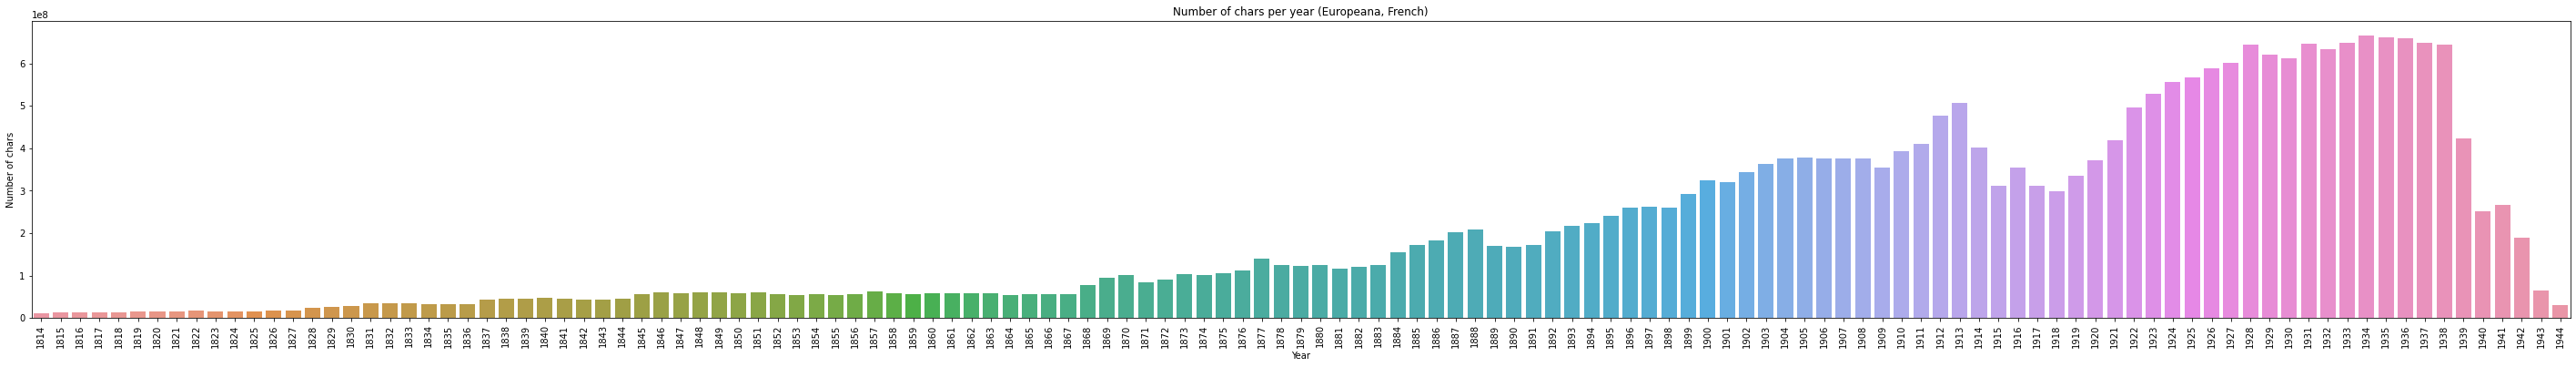

In [8]:
df_french_europeana_stats = pd.DataFrame(french_char_stats_dict.items(), columns=['year', 'length'])

plt.figure(figsize=(50, 6))

french_europeana_plot = sns.barplot(x="year", y="length", data=df_french_europeana_stats.sort_values(by=['year']))

french_europeana_plot.set_title("Number of chars per year (Europeana, French)")
french_europeana_plot.set(ylabel="Number of chars")
french_europeana_plot.set(xlabel="Year")
french_europeana_plot.set_xticklabels(french_europeana_plot.get_xticklabels(), rotation=90)

fig = french_europeana_plot.get_figure()
fig.savefig("./figures/french_europeana_corpus_stats.png")

# Finnish Europeana Corpus Stats

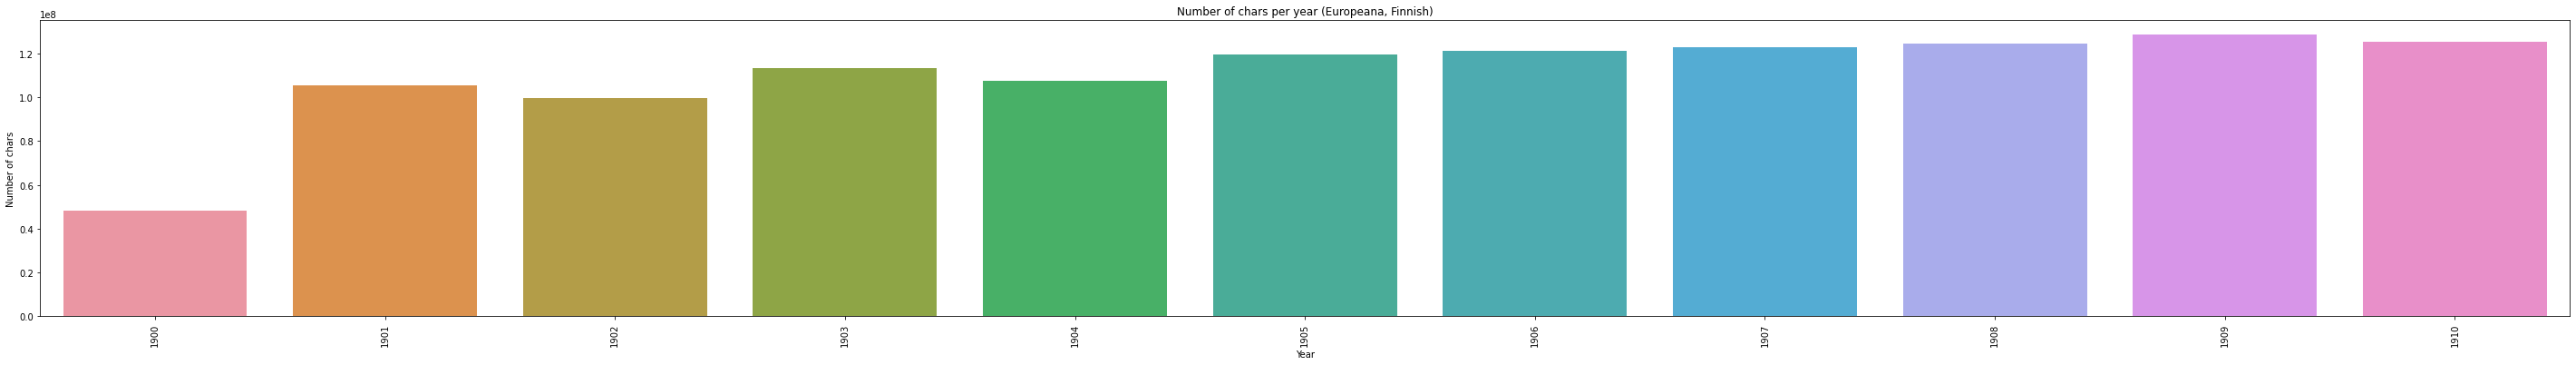

In [9]:
df_finnish_europeana_stats = pd.DataFrame(finnish_char_stats_dict.items(), columns=['year', 'length'])

plt.figure(figsize=(50, 6))

finnish_europeana_plot = sns.barplot(x="year", y="length",
                                     data=df_finnish_europeana_stats.sort_values(by=['year']))

finnish_europeana_plot.set_title("Number of chars per year (Europeana, Finnish)")
finnish_europeana_plot.set(ylabel="Number of chars")
finnish_europeana_plot.set(xlabel="Year")
finnish_europeana_plot.set_xticklabels(finnish_europeana_plot.get_xticklabels(), rotation=90)

fig = finnish_europeana_plot.get_figure()
fig.savefig("./figures/finnish_europeana_corpus_stats.png")

# Swedish Europeana Corpus Stats

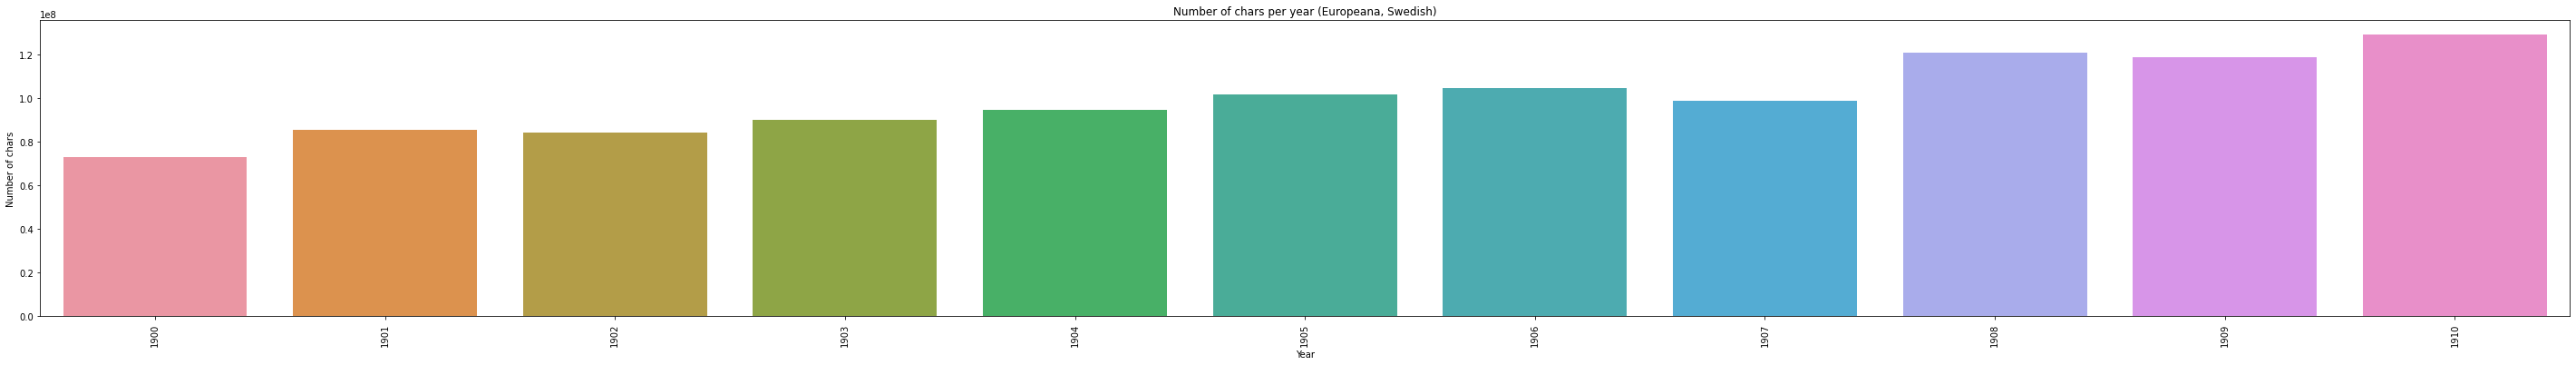

In [10]:
df_swedish_europeana_stats = pd.DataFrame(swedish_char_stats_dict.items(), columns=['year', 'length'])

plt.figure(figsize=(50, 6))

swedish_europeana_plot = sns.barplot(x="year", y="length",
                                     data=df_swedish_europeana_stats.sort_values(by=['year']))

swedish_europeana_plot.set_title("Number of chars per year (Europeana, Swedish)")
swedish_europeana_plot.set(ylabel="Number of chars")
swedish_europeana_plot.set(xlabel="Year")
swedish_europeana_plot.set_xticklabels(swedish_europeana_plot.get_xticklabels(), rotation=90)

fig = swedish_europeana_plot.get_figure()
fig.savefig("./figures/swedish_europeana_corpus_stats.png")

# Mixed Corpus Stats

In [11]:
all_dicts = [bl_char_stats_dict,
             german_char_stats_dict,
             french_char_stats_dict,
             finnish_char_stats_dict,
             swedish_char_stats_dict]

all_languages_stats_dict = defaultdict(int)
for d in all_dicts:
    for k, v in d.items():
        # Fix for British Library Corpus, only >= 1800
        # Fix for 1945 - 1999
        if k and int(k) >= 1800 and int(k) < 1945:
            all_languages_stats_dict[k] += v

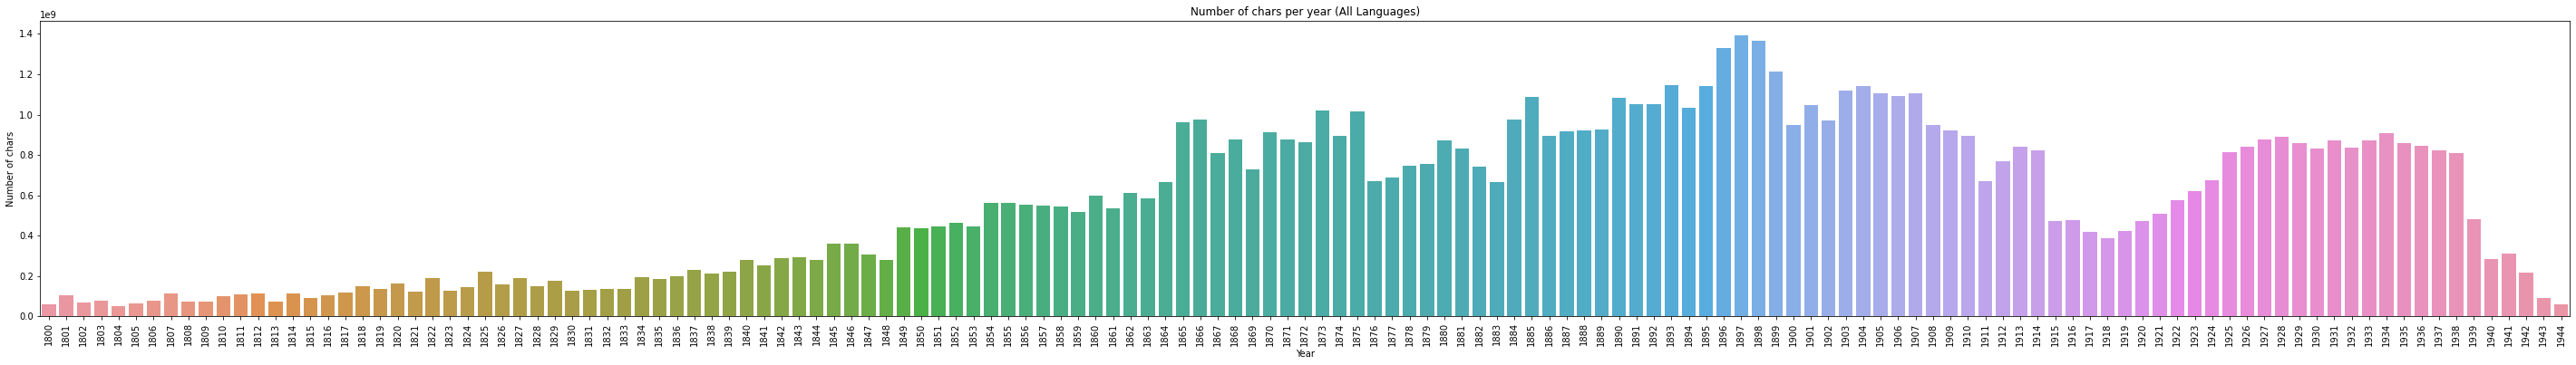

In [12]:
df_all_stats = pd.DataFrame(all_languages_stats_dict.items(), columns=['year', 'length'])

plt.figure(figsize=(50, 6))

all_plot = sns.barplot(x="year", y="length", data=df_all_stats.sort_values(by=['year']))

all_plot.set_title("Number of chars per year (All Languages)")
all_plot.set(ylabel="Number of chars")
all_plot.set(xlabel="Year")
all_plot.set_xticklabels(all_plot.get_xticklabels(), rotation=90)

fig = all_plot.get_figure()
fig.savefig("./figures/all_corpus_stats.png")